In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [454]:
DEFINITION_H = 1980
DEFINITION_W = 1080
CHANNELS_NUMBER = 3

In [532]:
class ImageRender():
    def __init__(self, height, wight, channels):
        self.kernel = np.zeros(height*wight*channels)
        self.kernel = self.kernel.reshape((height, wight, channels)) 
        
    def __call__(self, polygon, texture):
        a, b, c = polygon
        x_a, y_a, z_a = a
        x_b, y_b, z_b = b
        x_c, y_c, z_c = c

        x_c_to_b_ranges = np.linspace(x_c, x_b, 1000).astype(int)
        y_c_to_b_ranges =  np.linspace(y_c, y_b, 1000).astype(int)
        z_c_to_b_ranges =  np.linspace(z_c, z_b, 1000).astype(int)

        for x_c_to_b, y_c_to_b, z_c_to_b in zip(x_c_to_b_ranges, y_c_to_b_ranges, z_c_to_b_ranges):
            x_a_to_c_to_b_ranges = np.linspace(x_a, x_c_to_b, 1000).astype(int)
            y_a_to_c_to_b_ranges = np.linspace(y_a, y_c_to_b, 1000).astype(int)
            z_a_to_c_to_b_ranges = np.linspace(z_a, z_c_to_b, 1000).astype(int)

            for x_a_to_c_to_b, y_a_to_c_to_b, z_a_to_c_to_b_ranges in zip(x_a_to_c_to_b_ranges, y_a_to_c_to_b_ranges, z_a_to_c_to_b_ranges):
                self.kernel[DEFINITION_H-1-y_a_to_c_to_b, x_a_to_c_to_b, :] = 1/z_a_to_c_to_b_ranges        
        
        self.apply_texture(texture)
        
    def apply_texture(self, texture):
        self.kernel = self.kernel*texture
        
    def render(self):
        image_to_render = self.kernel/255
        plt.imshow(self.kernel)           

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


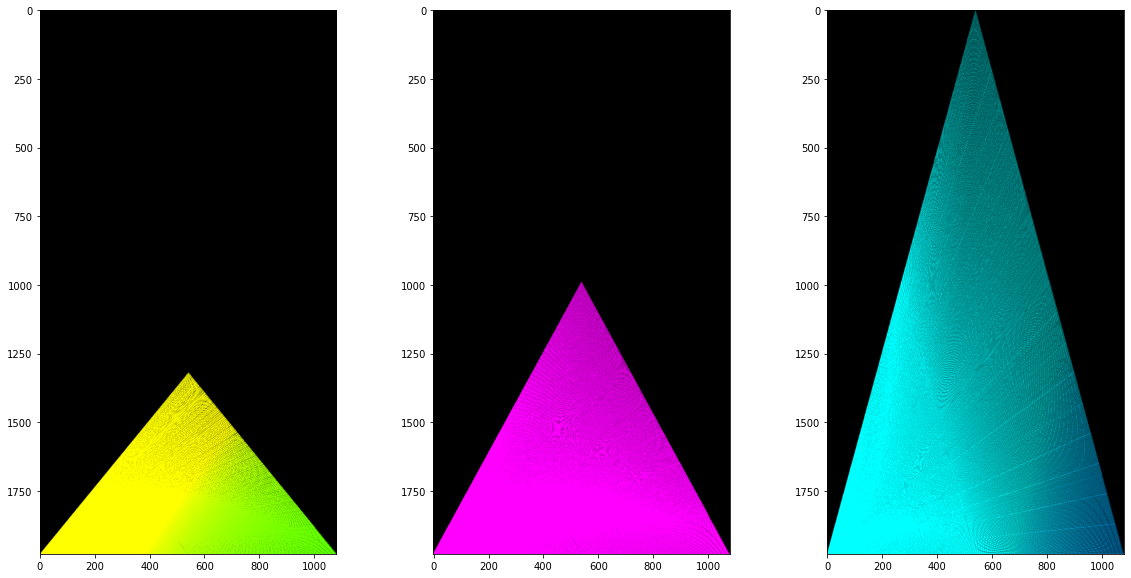

In [545]:
triangle1 = ((0, 0, 1), (DEFINITION_W/2, DEFINITION_H/3, 10), (DEFINITION_W-1, 0, 100))
triangle2 = ((0, 0, 1), (DEFINITION_W/2, DEFINITION_H/2, 10), (DEFINITION_W-1, 0, 100))
triangle3 = ((0, 0, 1), (DEFINITION_W/2, DEFINITION_H, 10), (DEFINITION_W-1, 0, 100))

first = ImageRender(DEFINITION_H, DEFINITION_W, CHANNELS_NUMBER)
first(triangle1, np.array([35, 255, 0]))

second = ImageRender(DEFINITION_H, DEFINITION_W, CHANNELS_NUMBER)
second(triangle2, np.array([251, 0, 255]))

third = ImageRender(DEFINITION_H, DEFINITION_W, CHANNELS_NUMBER)
third(triangle3, np.array([0, 62, 255]))

plt.subplots(figsize=(20,10))
plt.subplot(131)
first.render()
plt.subplot(132)
second.render()
plt.subplot(133)
third.render()